# Level 2 – Task 4: Restaurant Chains Analysis

## 🔍 Objective:
1. Identify if there are any restaurant chains in the dataset.
2. Analyze the ratings and popularity (votes) of these chains.

## 🛠️ Approach:
- Use the `Restaurant Name` column to identify duplicates (chains).
- Group by name to find chains with multiple outlets.
- Calculate average rating and total votes per chain.
- Visualize the top chains by count, rating, and popularity.

## 📈 Insights:
Analyzing chains helps spot market leaders and how well-known brands perform compared to local restaurants.

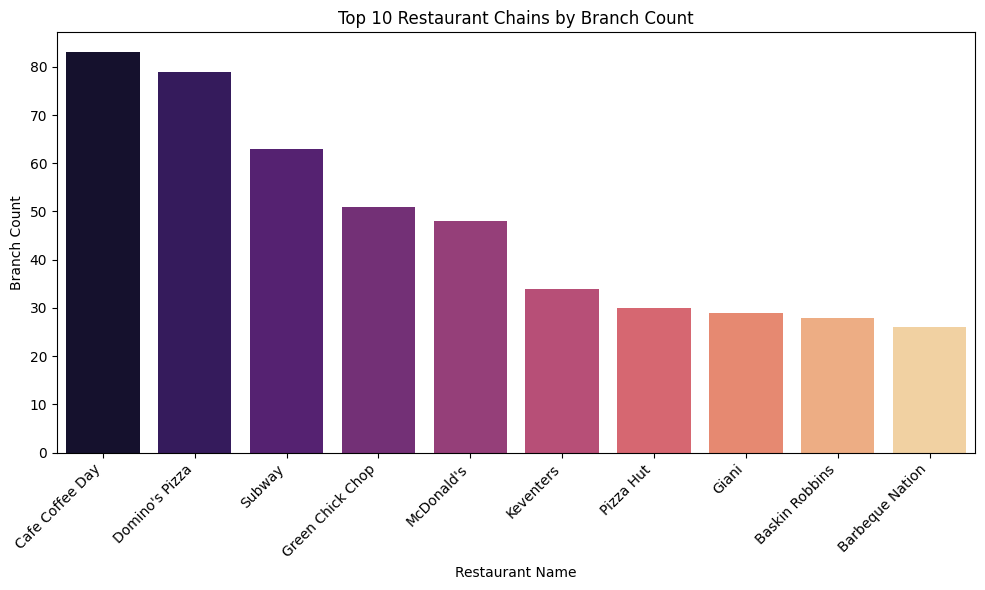

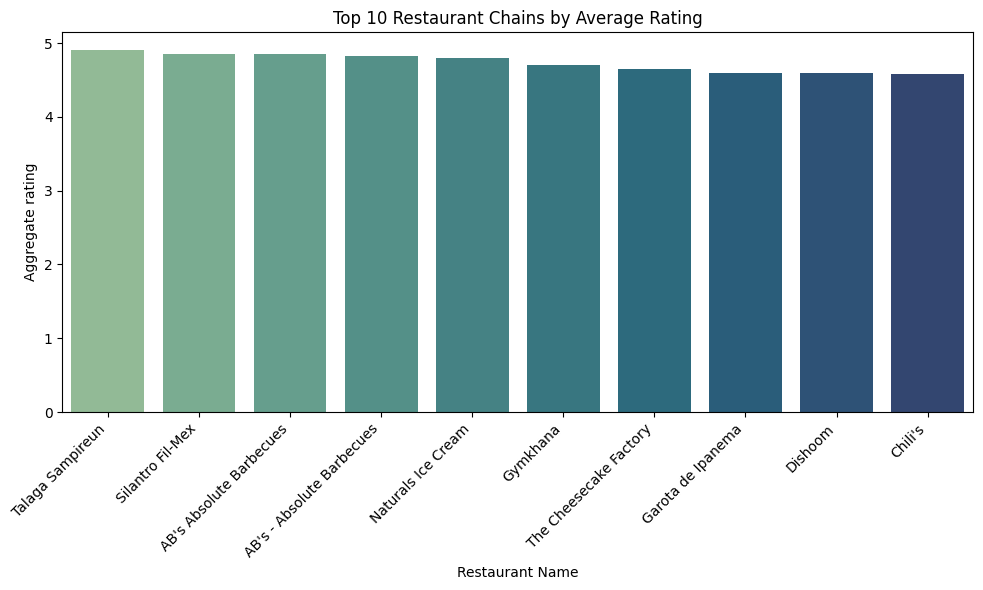

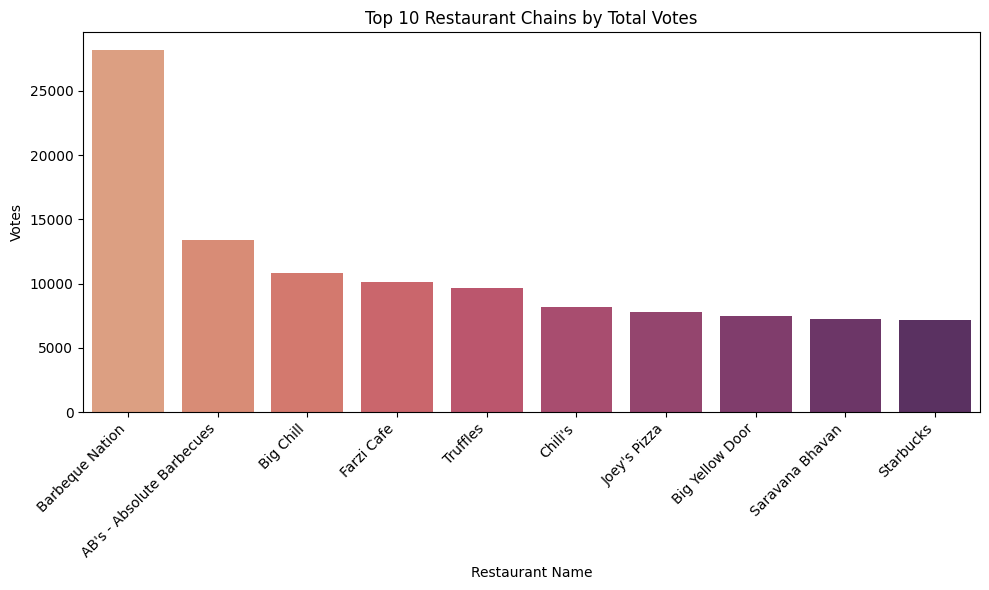

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("../Dataset.csv")
df = df.dropna(subset=['Restaurant Name', 'Aggregate rating', 'Votes'])

# Convert to proper types
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Count restaurants by name to find chains
restaurant_counts = df['Restaurant Name'].value_counts()
chains = restaurant_counts[restaurant_counts > 1].index

# Filter chain restaurants
chain_data = df[df['Restaurant Name'].isin(chains)]

# Group by chain name
chain_summary = chain_data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant Name': 'count'
}).rename(columns={'Restaurant Name': 'Branch Count'}).reset_index()

# Top 10 most common chains
top_chains = chain_summary.sort_values(by='Branch Count', ascending=False).head(10)

# Plot - Top 10 Chains by Number of Outlets
plt.figure(figsize=(10,6))
sns.barplot(data=top_chains, x='Restaurant Name', y='Branch Count', hue='Restaurant Name', legend=False, palette='magma')
plt.title("Top 10 Restaurant Chains by Branch Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot - Top 10 Chains by Average Rating
top_rated_chains = chain_summary.sort_values(by='Aggregate rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_rated_chains, x='Restaurant Name', y='Aggregate rating', hue='Restaurant Name', legend=False, palette='crest')
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot - Top 10 Chains by Votes
most_voted_chains = chain_summary.sort_values(by='Votes', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=most_voted_chains, x='Restaurant Name', y='Votes', hue='Restaurant Name', legend=False, palette='flare')
plt.title("Top 10 Restaurant Chains by Total Votes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()